今天我们继续学习PyTorch

In [1]:
import torch as tc

In [8]:
tc.manual_seed(0)

In [10]:
x = tc.randn(2,5)

In [11]:
print(x)

tensor([[ 1.5410, -0.2934, -2.1788,  0.5684, -1.0845],
        [-1.3986,  0.4033,  0.8380, -0.7193, -0.4033]])


In [12]:
x[0,:]

tensor([ 1.5410, -0.2934, -2.1788,  0.5684, -1.0845])

In [13]:
x[:,-1] # 获取最后一列数据

tensor([-1.0845, -0.4033])

In [14]:
mask = x>0
print(mask)

tensor([[ True, False, False,  True, False],
        [False,  True,  True, False, False]])


In [15]:
tc.masked_select(x, mask) # 选择出大于0的值

tensor([1.5410, 0.5684, 0.4033, 0.8380])

In [16]:
tc.nonzero(mask) # 选择出>0的下标

tensor([[0, 0],
        [0, 3],
        [1, 1],
        [1, 2]])

In [18]:
index = tc.LongTensor([[0,1,1]])

In [19]:
print(index)

tensor([[0, 1, 1]])


In [20]:
tc.gather(x, 0, index) # 指定维度上选择数据

tensor([[1.5410, 0.4033, 0.8380]])

In [21]:
index = tc.LongTensor([[0,1,1],[1,1,1]])
a = tc.gather(x, 1, index)
print(a)

tensor([[ 1.5410, -0.2934, -0.2934],
        [ 0.4033,  0.4033,  0.4033]])


In [22]:
z = tc.zeros(2,3)

In [23]:
z.scatter_(1,index,a) # gather的反操作

tensor([[ 1.5410, -0.2934,  0.0000],
        [ 0.0000,  0.4033,  0.0000]])

## 广播机制

In [24]:
import numpy as np
import torch

In [25]:
A = np.arange(0, 40, 10).reshape(4, 1)

In [26]:
B = np.arange(0, 3)

In [27]:
print(A)

[[ 0]
 [10]
 [20]
 [30]]


In [28]:
print(B)

[0 1 2]


In [29]:
A1 = torch.from_numpy(A)
B1 = torch.from_numpy(B)

In [30]:
C = A1 + B1

In [31]:
print(C)

tensor([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]])


In [32]:
B2 = B1.unsqueeze(0)

In [33]:
print(B2.shape)

torch.Size([1, 3])


In [34]:
A2 = A1.expand(4,3)

In [35]:
print(A2)

tensor([[ 0,  0,  0],
        [10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]])


In [36]:
B3 = B2.expand(4,3)

In [39]:
print(B3)

tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])


In [40]:
C1 = A2 + B3

In [43]:
mask = (C==C1) # C 应该与 C1 相等

In [44]:
print(mask)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True]])


## 逐个元素操作

In [2]:
import torch

In [3]:
t = torch.randn(1,3)
t1 = torch.randn(3,1)
t2 = torch.randn(1,3)
print(t)
print(t1)
print(t2)

tensor([[0.4552, 1.8954, 1.1432]])
tensor([[-0.4778],
        [-0.8081],
        [ 1.4975]])
tensor([[2.3140, 1.3106, 1.1935]])


In [4]:
res = torch.addcdiv(t, 0.1, t1, t2)
print(res)
print(t1/t2)

tensor([[0.4345, 1.8589, 1.1032],
        [0.4202, 1.8337, 1.0755],
        [0.5199, 2.0097, 1.2687]])
tensor([[-0.2065, -0.3646, -0.4003],
        [-0.3492, -0.6166, -0.6771],
        [ 0.6471,  1.1426,  1.2548]])


/Users/gdhu/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This overload of addcdiv is deprecated:
	addcdiv(Tensor input, Number value, Tensor tensor1, Tensor tensor2, *, Tensor out)
Consider using one of the following signatures instead:
	addcdiv(Tensor input, Tensor tensor1, Tensor tensor2, *, Number value, Tensor out) (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370126481/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  """Entry point for launching an IPython kernel.


In [5]:
res = torch.addcmul(t, 0.1, t1, t2)
print(res)
print(t1*t2)

tensor([[0.3446, 1.8328, 1.0862],
        [0.2682, 1.7895, 1.0468],
        [0.8017, 2.0917, 1.3219]])
tensor([[-1.1056, -0.6262, -0.5702],
        [-1.8699, -1.0591, -0.9644],
        [ 3.4652,  1.9626,  1.7872]])


In [6]:
t.add_(2) # t+2进行就地运算

tensor([[2.4552, 3.8954, 3.1432]])

In [7]:
torch.sigmoid(t)

tensor([[0.9209, 0.9801, 0.9586]])

sigmoid 激活函数： $ S(x) = \frac{1} {1 + e^{-x}} $ 

In [17]:
print(t) 
torch.clamp(t,1,3) # 将t限制在 [1,3]之间

tensor([[2.4552, 3.8954, 3.1432]])


tensor([[2.4552, 3.0000, 3.0000]])

## 归并操作

In [18]:
import torch

In [19]:
a = torch.linspace(0,10,6)

In [20]:
a = a.view((2,3))

In [21]:
print(a)

tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])


In [25]:
b = a.sum(dim=1)
print(b.shape)
print(b)

torch.Size([2])
tensor([ 6., 24.])


In [27]:
b = a.sum(dim=0) # 
print(b.shape)
print(b)

torch.Size([3])
tensor([ 6., 10., 14.])


In [28]:
a = torch.randn(10)

In [29]:
a

tensor([-1.0272,  0.1095, -1.0271,  0.4913, -1.3491,  1.9266,  0.3530, -1.5348,
         1.5935, -0.5230])

In [30]:
torch.cumsum(a, dim=0) # yi = x1+x2+...+xi

tensor([-1.0272, -0.9177, -1.9449, -1.4535, -2.8026, -0.8760, -0.5230, -2.0579,
        -0.4644, -0.9874])

## 比较操作

In [31]:
x = torch.linspace(0,10,6).reshape(2,3)

In [32]:
torch.max(x)

tensor(10.)

In [33]:
torch.max(x, dim=0)

torch.return_types.max(
values=tensor([ 6.,  8., 10.]),
indices=tensor([1, 1, 1]))

In [37]:
torch.topk(x,1, dim=1) # 指定axis上的最高K个值

torch.return_types.topk(
values=tensor([[ 4.],
        [10.]]),
indices=tensor([[2],
        [2]]))

## 矩阵操作

In [1]:
import torch

In [2]:
a = torch.tensor([2,3])

In [3]:
b = torch.tensor([3,4])

In [4]:
a@b

tensor(18)

In [5]:
x = torch.randint(10,(2,3))

In [6]:
print(x)

tensor([[5, 1, 6],
        [2, 7, 6]])


In [7]:
y = torch.randint(6, (3,4))

In [8]:
print(y)

tensor([[4, 3, 2, 0],
        [4, 2, 1, 0],
        [5, 5, 1, 2]])


In [9]:
torch.mm(x, y)

tensor([[54, 47, 17, 12],
        [66, 50, 17, 12]])

In [10]:
x = torch.randint(10, (2, 2, 3))

In [11]:
y = torch.randint(6, (2,3,4))

In [12]:
print(x)

tensor([[[1, 0, 1],
         [0, 8, 5]],

        [[9, 6, 4],
         [8, 7, 6]]])


In [13]:
print(y)

tensor([[[1, 2, 0, 3],
         [3, 0, 1, 3],
         [3, 0, 1, 2]],

        [[2, 2, 3, 4],
         [3, 1, 0, 2],
         [1, 5, 1, 4]]])


In [15]:
z = torch.bmm(x,y)

In [16]:
print(z)

tensor([[[ 4,  2,  1,  5],
         [39,  0, 13, 34]],

        [[40, 44, 31, 64],
         [43, 53, 30, 70]]])


In [17]:
print(z.shape)

torch.Size([2, 2, 4])


## Tensor 与 Autograd

In [19]:
import torch

In [20]:
x = torch.Tensor([2]) # requires_grad 默认为 False
print(x)

tensor([2.])


In [21]:
w = torch.randn(1, requires_grad=True)
print(w)

tensor([-0.0467], requires_grad=True)


In [23]:
b = torch.randn(1, requires_grad=True)
print(b)

tensor([-0.9532], requires_grad=True)


In [25]:
y = torch.mul(w,x) # w*x
print(y)

tensor([-0.0934], grad_fn=<MulBackward0>)


In [27]:
z = torch.add(y, b) # y+b
print(z)

tensor([-1.0466], grad_fn=<AddBackward0>)


In [30]:
print("x,w,b的requires_grad属性为：{}, {}, {}".format(x.requires_grad, w.requires_grad, b.requires_grad))

x,w,b的requires_grad属性为：False, True, True


In [31]:
print("y,z的requires_grad属性为：{}, {}".format(y.requires_grad, z.requires_grad))
# y,z 与 w,b 有依赖关系

y,z的requires_grad属性为：True, True


In [32]:
print("x，w，b，y，z的是否为叶子节点：{},{},{},{},{}".format(x.is_leaf,w.is_leaf,b.is_leaf,y.is_leaf,z.is_leaf))
#x，w，b，y，z的是否为叶子节点：True,True,True,False,False

x，w，b，y，z的是否为叶子节点：True,True,True,False,False


In [33]:
print("x，w，b的grad_fn属性：{},{},{}".format(x.grad_fn,w.grad_fn,b.grad_fn))
#因x，w，b为用户创建的，为通过其他张量计算得到，故x，w，b的grad_fn属性：None,None,None
#查看非叶子节点的grad_fn属性

x，w，b的grad_fn属性：None,None,None


In [34]:
print("y, z的grad_fn属性：{},{}".format(y.grad_fn, z.grad_fn))

y, z的grad_fn属性：<MulBackward0 object at 0x7ff81e806690>,<AddBackward0 object at 0x7ff81e806990>


In [35]:
z.backward()

In [36]:
print("w, b, x的梯度分别为：{}, {}, {}".format(w.grad, b.grad, x.grad))

w, b, x的梯度分别为：tensor([2.]), tensor([1.]), None


In [37]:
print("非叶子结点y，z的梯度为: {}, {}".format(y.grad, z.grad))

非叶子结点y，z的梯度为: None, None


/Users/gdhu/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


### 非标量反向传播

In [58]:
import torch

In [59]:
x = torch.tensor([[2,3]], dtype=torch.float, requires_grad=True)
print(x)

tensor([[2., 3.]], requires_grad=True)


In [60]:
J = torch.zeros(2,2)

In [61]:
y = torch.zeros(1, 2)

In [62]:
y[0, 0] = x[0, 0] ** 2 + 3 * x[0, 1]
y[0, 1] = x[0, 1] ** 2 + 2 * x[0, 0]

In [63]:
print(y)

tensor([[13., 13.]], grad_fn=<CopySlices>)


In [64]:
# 生成y1对x的梯度
y.backward(torch.Tensor([[1,0]]), retain_graph=True)
J[0] = x.grad

In [65]:
x.grad = torch.zeros_like(x.grad) # 梯度是累加的，需要将x的梯度清零

In [66]:
y.backward(torch.Tensor([[0,1]]), retain_graph=True)

In [67]:
J[1] = x.grad

In [68]:
print(J)

tensor([[4., 3.],
        [2., 6.]])


In [69]:
print(x.grad)

tensor([[2., 6.]])


## 使用Tensor及Autograd实现机器学习

In [70]:
import torch as t
%matplotlib inline

In [71]:
from matplotlib import pyplot as plt

In [72]:
t.manual_seed(1)

In [73]:
x = t.unsqueeze(t.linspace(-1,1,100),dim=1)

In [82]:
y = 3*x.pow(2) + 2 + 0.2*t.rand(x.size()) # 造一些带有噪音的数据
print(y.shape)

torch.Size([100, 1])


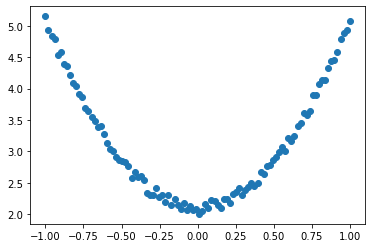

In [76]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [77]:
# 初始化权重
w = t.randn(1,1, dtype=t.float, requires_grad=True)
print(w)

tensor([[-0.3968]], requires_grad=True)


In [78]:
b = t.randn(1,1, dtype=t.float, requires_grad=True)
print(b)

tensor([[-0.6571]], requires_grad=True)


In [79]:
# 训练模型

In [91]:
lr = 0.00001 # 学习率

In [93]:
loss = 0
for i in range(100000):
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5*(y_pred-y) ** 2
    loss = loss.sum()
    
    loss.backward()
    
    with t.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
    
    w.grad.zero_()
    b.grad.zero_()
print(loss)

tensor(0.1669, grad_fn=<SumBackward0>)


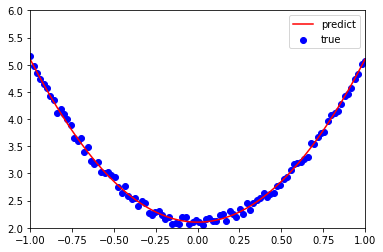

In [96]:
plt.plot(x.numpy(), y_pred.detach().numpy(), 'r-', label='predict')
plt.scatter(x.numpy(), y.numpy(), color='blue', marker='o', label='true')
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()

In [97]:
print(w, b)

tensor([[2.9967]], requires_grad=True) tensor([[2.1038]], requires_grad=True)
